QUESTION- Consider a roulette-style decision game which involves a spinning wheel with equal probabilities for landing on red, black, or green, where red and black each take up x% of the wheel, and green takes up (100-2x)%.The player's objective is to maximise their returns over a series of bets.
Strategies to Evaluate:
1. Constant Bet on Red/Black: Always bet a fixed amount on either red or black.
2. Doubling Bet on Red/Black: After a loss, double the bet on the same colour. If you win, return to the initial bet.
3. Constant Bet on Green: Always bet a fixed amount on green.
4. Random Betting: Randomly choose a colour and bet a fixed amount on it each time.
Evaluate the different betting strategies using Monte Carlo simulations for different values of x. Determine the expected return and risk of ruin (the percentage of simulations where the bankroll reaches $0) for each strategy and identify which strategy minimises losses over the long term.Include a detailed analysis.
Details for the setup:
● Each simulation will run for 1000 rounds of the game.
● Evaluate each strategy over 1000 simulations to smooth out randomness.
● All probabilities should be non-zero.
● Initial bankroll for each strategy is set to a fixed amount of $1000.
● The fixed bet amount should be set at $10 for strategies that use a constant bet.
● For the doubling strategy, start with a $10 bet, doubling after each loss but ensuring the total betting amount does not exceed the bankroll.
● Payouts are as follows: Winning a bet on red or black doubles the bet; winning on green multiplies the bet by 18.

constant_red_black
Expected Return:0.00
Risk of ruin:100.00%
doubling_red_black
Expected Return:370.50
Risk of ruin:100.00%
constant_green
Expected Return:167370.48
Risk of ruin:0.00%
random_betting
Expected Return:49968.42
Risk of ruin:0.00%
constant_red_black
Expected Return:0.00
Risk of ruin:100.00%
doubling_red_black
Expected Return:371.36
Risk of ruin:100.00%
constant_green
Expected Return:163798.38
Risk of ruin:0.00%
random_betting
Expected Return:48875.74
Risk of ruin:0.00%
constant_red_black
Expected Return:0.00
Risk of ruin:100.00%
doubling_red_black
Expected Return:372.14
Risk of ruin:100.00%
constant_green
Expected Return:160206.48
Risk of ruin:0.00%
random_betting
Expected Return:47795.20
Risk of ruin:0.00%
constant_red_black
Expected Return:0.00
Risk of ruin:100.00%
doubling_red_black
Expected Return:372.52
Risk of ruin:100.00%
constant_green
Expected Return:156529.44
Risk of ruin:0.00%
random_betting
Expected Return:46663.52
Risk of ruin:0.00%
constant_red_black
Expected 

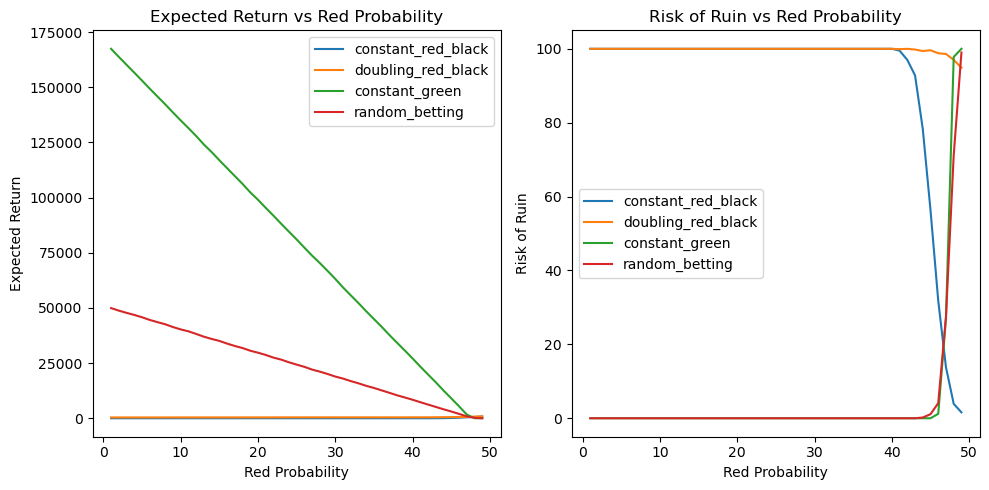

In [2]:
import random
import matplotlib.pyplot as plt
class RouletteGame:
    def __init__(self, red_prob, green_prob):
        self.red_prob = red_prob
        self.green_prob = green_prob
        self.black_prob = 1 - red_prob - green_prob

    def spin_wheel(self):
        rand_num = random.uniform(0, 1)
        if rand_num < self.red_prob:
            return 'red'
        elif rand_num < self.red_prob + self.black_prob:
            return 'black'
        else:
            return 'green'

def constant_bet_red_black(game, bet_amount, num_rounds):
    bankroll = 1000
    color_choose = random.choice(['red', 'black'])
    for _ in range(num_rounds):
        #color_choose = random.choice(['red', 'black'])
        outcome = game.spin_wheel()
        if bankroll>0:
         if outcome == color_choose:
            bankroll += 2*bet_amount - bet_amount
            color_choose = random.choice(['red', 'black'])
         else:
             bankroll -=bet_amount
        if bankroll <= 0:
            return bankroll, True  # Bankrupt
    return bankroll, False

import random

def doubling_bet_red_black(game, initial_bet_amount, num_rounds):
    bankroll = 1000
    color_choose = random.choice(['red', 'black'])
    bet_amount = initial_bet_amount
    for _ in range(num_rounds):
        #color_choose = random.choice(['red', 'black'])
        if bet_amount > bankroll:
            bet_amount= bankroll
        outcome = game.spin_wheel()
        if outcome == color_choose:
                bankroll += 2 * bet_amount - bet_amount
                bet_amount = initial_bet_amount
                color_choose = random.choice(['red', 'black'])
        else:
            bankroll -= bet_amount
            bet_amount *= 2
        if bankroll <= 0:
            return bankroll, True  # Bankrupt
    return bankroll, False


def constant_bet_green(game, bet_amount, num_rounds):
    bankroll = 1000
    for _ in range(num_rounds):
        outcome = game.spin_wheel()
        if outcome == 'green':
            bankroll += bet_amount * 18 -bet_amount
        else:
            bankroll -= bet_amount
            if bankroll <= 0:
                return bankroll, True  # Bankrupt
    return bankroll, False


def random_betting(game, bet_amount, num_rounds):
    bankroll = 1000
    for _ in range(num_rounds):
        outcome=game.spin_wheel()
        color = random.choice(['red', 'black', 'green'])
        if color == outcome:
            if color=='green':
             bankroll += bet_amount * 18 - bet_amount
            else:
             bankroll += bet_amount*2 - bet_amount
        else:
            bankroll -= bet_amount
        if bankroll <= 0:
            return bankroll, True  # Bankrupt
    return bankroll, False


def calculate_expected_return(results):
    return sum(results) / len(results)

def calculate_risk_of_ruin(results):
    num_simulations = len(results)
    num_bankruptcies = sum(1 for result in results if result[1])
    return (num_bankruptcies / num_simulations) * 100

def monte_carlo_simulation(red_prob, num_simulations=1000, num_rounds=1000):
    game = RouletteGame(red_prob, 1- 2*red_prob) 
    results = {'constant_red_black': [],
               'doubling_red_black': [],
               'constant_green': [],
               'random_betting': []}

    for _ in range(num_simulations):
        results['constant_red_black'].append(constant_bet_red_black(game, 10, num_rounds))
        results['doubling_red_black'].append(doubling_bet_red_black(game, 10, num_rounds))
        results['constant_green'].append(constant_bet_green(game, 10, num_rounds))
        results['random_betting'].append(random_betting(game, 10, num_rounds))

    return results

def analyze_results(results):
    #print("Strategy\tExpected Return\tRisk of Ruin")
    #print("\n")
    for strategy, strategy_results in results.items():
        bankroll_results = [result[0] for result in strategy_results]
        expected_return = calculate_expected_return(bankroll_results)
        risk_of_ruin = calculate_risk_of_ruin(strategy_results)
        print(f"{strategy}\nExpected Return:{expected_return:.2f}\nRisk of ruin:{risk_of_ruin:.2f}%")


x_range = range(1,50)
for x in x_range:
    x = x / 100  
    results = monte_carlo_simulation(x)
    analyze_results(results)

def plot_results(expected_return_data, risk_of_ruin_data, x_range):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    for strategy, expected_return_values in expected_return_data.items():
        plt.plot(x_range, expected_return_values, label=strategy)
    plt.xlabel('Red Probability')
    plt.ylabel('Expected Return')
    plt.title('Expected Return vs Red Probability')
    plt.legend()

    plt.subplot(1, 2, 2)
    for strategy, risk_of_ruin_values in risk_of_ruin_data.items():
        plt.plot(x_range, risk_of_ruin_values, label=strategy)
    plt.xlabel('Red Probability')
    plt.ylabel('Risk of Ruin')
    plt.title('Risk of Ruin vs Red Probability')
    plt.legend()

    plt.tight_layout()
    plt.show()

def monte_carlo_simulation(red_prob_range, num_simulations=1000, num_rounds=1000):
    expected_return_data = {'constant_red_black': [],
                            'doubling_red_black': [],
                            'constant_green': [],
                            'random_betting': []}

    risk_of_ruin_data = {'constant_red_black': [],
                         'doubling_red_black': [],
                         'constant_green': [],
                         'random_betting': []}

    for red_prob in red_prob_range:
        red_prob_value = red_prob / 100
        game = RouletteGame(red_prob_value, 1 - 2 * red_prob_value)
        results = monte_carlo_simulation_single(game, num_simulations, num_rounds)
        
        for strategy, strategy_results in results.items():
            bankroll_results = [result[0] for result in strategy_results]
            expected_return = calculate_expected_return(bankroll_results)
            risk_of_ruin = calculate_risk_of_ruin(strategy_results)
            
            expected_return_data[strategy].append(expected_return)
            risk_of_ruin_data[strategy].append(risk_of_ruin)

    return expected_return_data, risk_of_ruin_data

def monte_carlo_simulation_single(game, num_simulations, num_rounds):
    results = {'constant_red_black': [],
               'doubling_red_black': [],
               'constant_green': [],
               'random_betting': []}

    for _ in range(num_simulations):
        results['constant_red_black'].append(constant_bet_red_black(game, 10, num_rounds))
        results['doubling_red_black'].append(doubling_bet_red_black(game, 10, num_rounds))
        results['constant_green'].append(constant_bet_green(game, 10, num_rounds))
        results['random_betting'].append(random_betting(game, 10, num_rounds))

    return results

x_range = range(1, 50)
expected_return_data, risk_of_ruin_data = monte_carlo_simulation(x_range)
plot_results(expected_return_data, risk_of_ruin_data, x_range)

    1.Constant Red Black:
        Expected Return: The expected return remains at 0.00 initially for lower values of x and still remains lower(but higher than constant green and random betting) for x=49.
        Risk of Ruin: The risk of ruin is 100% for lower values of x, indicating a high probability of going bankrupt initially. Then it comes down to 0% drastically as value of x increases and becomes 0 at x= 49.

    2.Doubling Red Black:
        Expected Return: Similar to constant red/black, the expected return remains at 0.00 initially for lower values of x(but higher than constant green and random betting) and still remains lower for x=49.
        Risk of Ruin:  The risk of ruin is 100% for lower values of x, indicating a high probability of going bankrupt initially. Then it begins to decrease slowly and is 95.2% at x=49,indicating there is still high chance to go bankrupt.

    3.Constant Green:
        Expected Return: The expectation value is very high in the beginning(167370.48) as there is major portion of green for lower values of x.But then it decreases constantly as x increases and finally approaches near 0.
        Risk of Ruin: The risk of ruin is consistently 0%, indicating a negligible probability of going bankrupt upto x=46 or 47. But then it abruptly increases to 100%

    4.Random Betting:
        Expected Return: The expectation value is very high in the beginning(49968.42).But then it decreases constantly as x increases and finally approaches near 0.
        Risk of Ruin: The risk of ruin is consistently 0%, similar to the constant green strategy, indicating a low probability of bankruptcy upto x=46 or 47. But then it abruptly increases to 100%.

Analysis:

    1.Both the constant red/black and doubling red/black strategies consistently result in losses over the long term, with a risk of ruin of 100%. These strategies involve betting on red/black with fixed or increasing bet amounts, which can lead to significant losses, especially during losing streaks.
    2.Random betting also shows promising results, offering moderate returns with no risk of ruin. However, the expected returns are generally lower compared to the constant green strategy.
    3.Among the four strategies, the constant green strategy is the most reliable for minimizing losses over the long term. It consistently provides high returns with no risk of ruin, making it a safer and more profitable option compared to the red/black strategies upto x<=45. For x>45, constant red/black is more suitable as it has 0% risk ruin and relatively high returns compared to other strategies.


